In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import warnings

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Import Data Transformation Libraries
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler

#Machine Learning, Feature Importance and Evaluation Metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor
from numpy import mean
import pickle

In [2]:
df1= pd.read_csv('appliancesload.csv')
df1

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,17/09/2013 22:08,695,88,0,0,0,0,0,0,0,0
1,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
2,17/09/2013 22:08,694,88,0,0,0,0,0,0,0,0
3,17/09/2013 22:08,702,88,0,0,0,0,0,0,0,0
4,17/09/2013 22:08,700,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1008348,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008349,10/04/2014 00:35,115,1,0,0,0,0,0,0,0,0
1008350,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0
1008351,10/04/2014 00:35,116,1,0,0,0,0,0,0,0,0


In [3]:
#Finding out thenumber of rows and columns
df1.shape

(1008353, 11)

In [4]:
#Finding the number of missing values
df1.isnull().sum()

Time               0
Aggregate          0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
dtype: int64

In [5]:
df1.nunique()

Time               109117
Aggregate            5546
Fridge-Freezer        283
Washing Machine       622
Dishwasher            224
Television Site        59
Microwave             342
Toaster               131
Hi-Fi                  40
Kettle                177
Overhead Fan           78
dtype: int64

In [6]:
df1.describe()

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
count,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06,1.008353e+06
mean,3.820216e+02,3.479929e+01,1.983280e+01,5.906683e+01,4.971157e+00,2.855182e+00,1.538795e+00,1.701917e+00,2.271616e+01,2.841396e-01
std,1.030238e+03,4.550342e+01,1.830864e+02,3.445591e+02,1.399453e+01,5.679923e+01,3.797913e+01,5.715690e+00,2.469302e+02,4.755458e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.480000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.420000e+02,8.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.947900e+04,1.690000e+03,2.571000e+03,2.358000e+03,6.200000e+01,2.048000e+03,2.048000e+03,1.536000e+03,2.933000e+03,1.024000e+03


In [7]:
#Converting Time column into datetime format
df1['Time'] = pd.to_datetime(df1['Time'], format='%d/%m/%Y %H:%M')

In [8]:
# The date column is broken down into year,month and day columns
df1['Year'] = df1['Time'].dt.year
df1['Date'] = df1['Time'].dt.date
df1['Month'] = df1['Time'].dt.month
df1['Day'] = df1['Time'].dt.day
df1['Hour'] = df1['Time'].dt.hour
df1['Minute'] = df1['Time'].dt.minute
df1['quarter'] = df1['Time'].dt.quarter
df1['dayofyear'] = df1['Time'].dt.dayofyear
df1['dayofmonth'] = df1['Time'].dt.day
df1['Week'] = df1['Time'].dt.isocalendar().week
df1

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,Year,Date,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008348,2014-04-10 00:35:00,115,1,0,0,0,0,0,0,0,...,2014,2014-04-10,4,10,0,35,2,100,10,15
1008349,2014-04-10 00:35:00,115,1,0,0,0,0,0,0,0,...,2014,2014-04-10,4,10,0,35,2,100,10,15
1008350,2014-04-10 00:35:00,116,1,0,0,0,0,0,0,0,...,2014,2014-04-10,4,10,0,35,2,100,10,15
1008351,2014-04-10 00:35:00,116,1,0,0,0,0,0,0,0,...,2014,2014-04-10,4,10,0,35,2,100,10,15


In [9]:
df1=df1[(df1['Year'] == 2013) ] 
df1

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,Year,Date,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,2013,2013-09-17,9,17,22,8,3,260,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,355,1,5,0,0,0,0,0,0,...,2013,2013-12-26,12,26,16,7,4,360,26,52
487247,2013-12-26 16:08:00,358,1,5,0,0,0,0,0,0,...,2013,2013-12-26,12,26,16,8,4,360,26,52
487248,2013-12-26 16:08:00,322,1,25,0,0,0,0,0,0,...,2013,2013-12-26,12,26,16,8,4,360,26,52
487249,2013-12-26 16:08:00,280,1,25,0,0,0,0,0,0,...,2013,2013-12-26,12,26,16,8,4,360,26,52


In [10]:
#Reading in the data for holidays
holiday_df=pd.read_csv("UK_Bank_Holidays.csv")
holiday_df["Holiday_Date"] = pd.to_datetime(holiday_df['Date'])
holiday_df['Holiday'] = holiday_df['Holiday_Date'].dt.date
holiday_df['H_Year'] = holiday_df['Holiday_Date'].dt.year
holiday_df

,Name,Bank Holiday,Date,Holiday_Date,Holiday,H_Year
0,New Year's Day,1,2009-01-01,2009-01-01,2009-01-01,2009
1,Robert Burns Night (Burns Night),0,2009-01-25,2009-01-25,2009-01-25,2009
2,Holocaust Memorial Day,0,2009-01-27,2009-01-27,2009-01-27,2009
3,Valentines Day,0,2009-02-14,2009-02-14,2009-02-14,2009
4,Shrove Tuesday (Pancake Day),0,2009-02-24,2009-02-24,2009-02-24,2009
...,...,...,...,...,...,...
380,Guy Fawkes Night,0,2020-11-05,2020-11-05,2020-11-05,2020
381,Remembrance Day (Remembrance Sunday),0,2020-11-08,2020-11-08,2020-11-08,2020
382,St Andrew's Day,0,2020-11-30,2020-11-30,2020-11-30,2020
383,Christmas,1,2020-12-25,2020-12-25,2020-12-25,2020


In [11]:
#Extracting bank holidays for the year 2013
holiday_df=holiday_df[(holiday_df['H_Year'] ==2013)]
holiday_df

,Name,Bank Holiday,Date,Holiday_Date,Holiday,H_Year
129,New Year's Day,1,2013-01-01,2013-01-01,2013-01-01,2013
130,Robert Burns Night (Burns Night),0,2013-01-25,2013-01-25,2013-01-25,2013
131,Holocaust Memorial Day,0,2013-01-27,2013-01-27,2013-01-27,2013
132,Shrove Tuesday (Pancake Day),0,2013-02-12,2013-02-12,2013-02-12,2013
133,Ash Wednesday,0,2013-02-13,2013-02-13,2013-02-13,2013
134,Valentines Day,0,2013-02-14,2013-02-14,2013-02-14,2013
135,St David's Day,0,2013-03-01,2013-03-01,2013-03-01,2013
136,Mothering Sunday (Mothers Day),0,2013-03-10,2013-03-10,2013-03-10,2013
137,St Patricks Day,0,2013-03-17,2013-03-17,2013-03-17,2013
138,Maundy Thursday,0,2013-03-28,2013-03-28,2013-03-28,2013


In [12]:
df2 = df1.merge(holiday_df, left_on = "Time",right_on = "Holiday_Date",how = 'left')
df2["is_holiday"] = np.where(df2['Holiday_Date'].isna(),0,1)
df2

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,dayofyear,dayofmonth,Week,Name,Bank Holiday,Date_y,Holiday_Date,Holiday,H_Year,is_holiday
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,260,17,38,NaN,NaN,NaN,NaT,NaN,NaN,0
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,260,17,38,NaN,NaN,NaN,NaT,NaN,NaN,0
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,260,17,38,NaN,NaN,NaN,NaT,NaN,NaN,0
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,260,17,38,NaN,NaN,NaN,NaT,NaN,NaN,0
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,260,17,38,NaN,NaN,NaN,NaT,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,355,1,5,0,0,0,0,0,0,...,360,26,52,NaN,NaN,NaN,NaT,NaN,NaN,0
487247,2013-12-26 16:08:00,358,1,5,0,0,0,0,0,0,...,360,26,52,NaN,NaN,NaN,NaT,NaN,NaN,0
487248,2013-12-26 16:08:00,322,1,25,0,0,0,0,0,0,...,360,26,52,NaN,NaN,NaN,NaT,NaN,NaN,0
487249,2013-12-26 16:08:00,280,1,25,0,0,0,0,0,0,...,360,26,52,NaN,NaN,NaN,NaT,NaN,NaN,0


In [13]:
# Dropping the unnecessary columns
df2=df2.dropna(axis=1)
df2

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,Date_x,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week,is_holiday
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,2013-09-17,9,17,22,8,3,260,17,38,0
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013-09-17,9,17,22,8,3,260,17,38,0
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,2013-09-17,9,17,22,8,3,260,17,38,0
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,2013-09-17,9,17,22,8,3,260,17,38,0
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,2013-09-17,9,17,22,8,3,260,17,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,355,1,5,0,0,0,0,0,0,...,2013-12-26,12,26,16,7,4,360,26,52,0
487247,2013-12-26 16:08:00,358,1,5,0,0,0,0,0,0,...,2013-12-26,12,26,16,8,4,360,26,52,0
487248,2013-12-26 16:08:00,322,1,25,0,0,0,0,0,0,...,2013-12-26,12,26,16,8,4,360,26,52,0
487249,2013-12-26 16:08:00,280,1,25,0,0,0,0,0,0,...,2013-12-26,12,26,16,8,4,360,26,52,0


In [14]:
df2.Month.unique()

array([ 9, 10, 12], dtype=int64)

In [15]:
df2.isnull().sum()

Time               0
Aggregate          0
Fridge-Freezer     0
Washing Machine    0
Dishwasher         0
Television Site    0
Microwave          0
Toaster            0
Hi-Fi              0
Kettle             0
Overhead Fan       0
Year               0
Date_x             0
Month              0
Day                0
Hour               0
Minute             0
quarter            0
dayofyear          0
dayofmonth         0
Week               0
is_holiday         0
dtype: int64

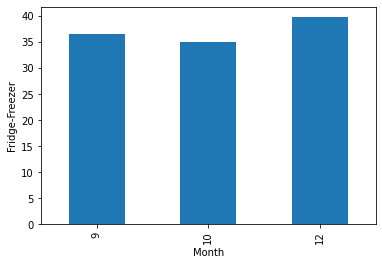

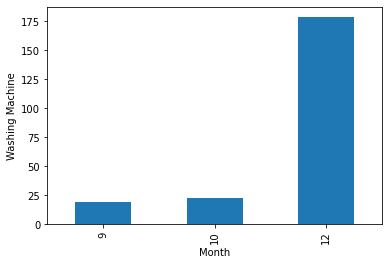

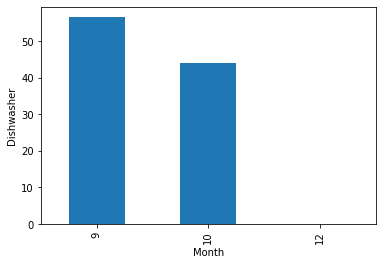

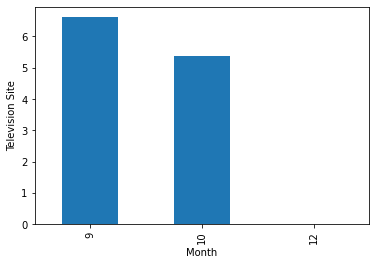

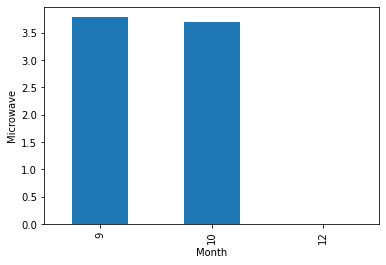

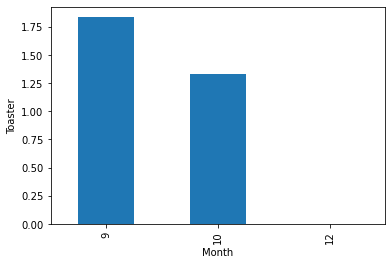

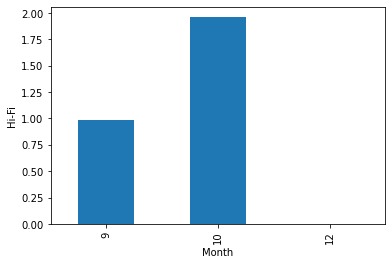

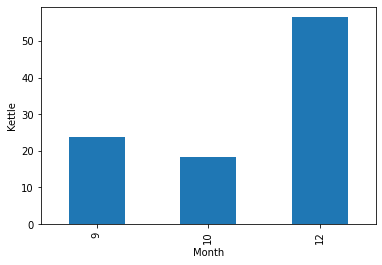

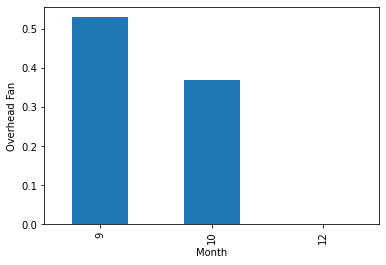

In [16]:
# The sum of the consumption of each appliance is gotten on a monthly basis and plotted against the month
df2.groupby('Month')['Fridge-Freezer'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Fridge-Freezer')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Washing Machine'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Washing Machine')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Dishwasher'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Dishwasher')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Television Site'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Television Site')
plt.xlabel('Month')
plt.show()

df1.groupby('Month')['Microwave'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Microwave')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Toaster'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Toaster')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Hi-Fi'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Hi-Fi')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Kettle'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Kettle')
plt.xlabel('Month')
plt.show()

df2.groupby('Month')['Overhead Fan'].mean().plot.bar(figsize=(6,4))
plt.ylabel('Overhead Fan')
plt.xlabel('Month')
plt.show()

In [17]:
dx = df2.drop(["Month","Aggregate","Year","Day","Hour","Minute",'quarter','Date_x','dayofyear','dayofmonth','Week','is_holiday'],axis=1)
dx

,Time,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
1,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
2,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
3,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
4,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,1,5,0,0,0,0,0,0,0
487247,2013-12-26 16:08:00,1,5,0,0,0,0,0,0,0
487248,2013-12-26 16:08:00,1,25,0,0,0,0,0,0,0
487249,2013-12-26 16:08:00,1,25,0,0,0,0,0,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_3468\612784620.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  fig=dx.mean().sort_values(ascending=False).plot.bar(figsize=(12,6))


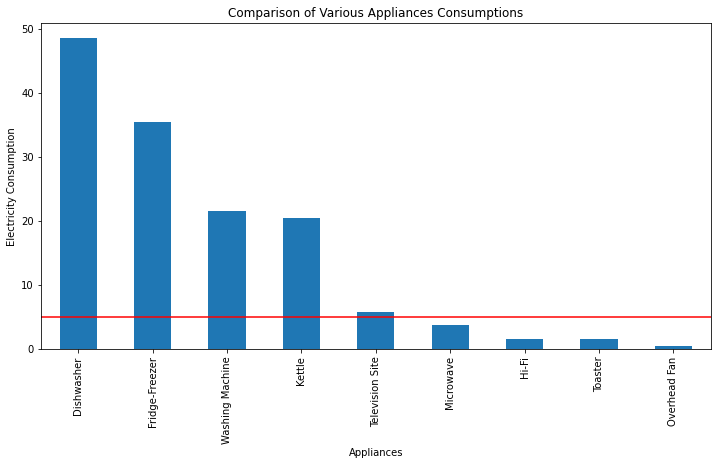

In [18]:
fig=dx.mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
fig.axhline(y=5, color='red')
plt.xlabel('Appliances')
plt.ylabel('Electricity Consumption')
plt.title("Comparison of Various Appliances Consumptions")
plt.show()

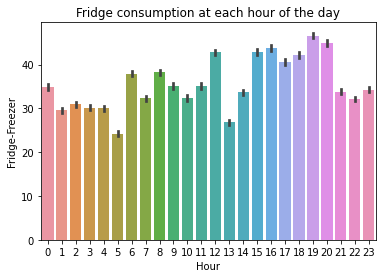

In [19]:
sns.barplot(x=df2['Hour'], y=df2['Fridge-Freezer'])
plt.title('Fridge consumption at each hour of the day')
plt.show()

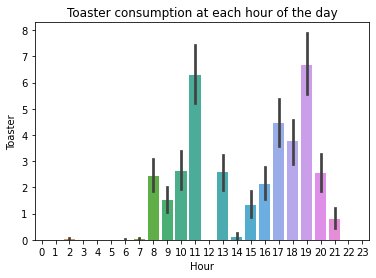

In [20]:
sns.barplot(x=df1['Hour'], y=df1['Toaster'])
plt.title('Toaster consumption at each hour of the day')
plt.show()

In [21]:
# Processing hours into different time of the day
def time_of_day(Hour):
    if Hour in [0,1,2,3,4,5,6,7,8,9,10,11]:
        period = 'Morning'
    elif Hour in range(12,17):
        period = 'Afternoon'
    elif Hour in range(17,20):
        period = 'Evening'
    else:
        period = 'Night'
    return period

In [22]:
df2['Period']=df2['Hour'].apply(time_of_day)
df2

C:\Users\user\AppData\Local\Temp\ipykernel_3468\973031111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Period']=df2['Hour'].apply(time_of_day)


,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week,is_holiday,Period
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,355,1,5,0,0,0,0,0,0,...,12,26,16,7,4,360,26,52,0,Afternoon
487247,2013-12-26 16:08:00,358,1,5,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon
487248,2013-12-26 16:08:00,322,1,25,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon
487249,2013-12-26 16:08:00,280,1,25,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon


<AxesSubplot:xlabel='Month', ylabel='Overhead Fan'>

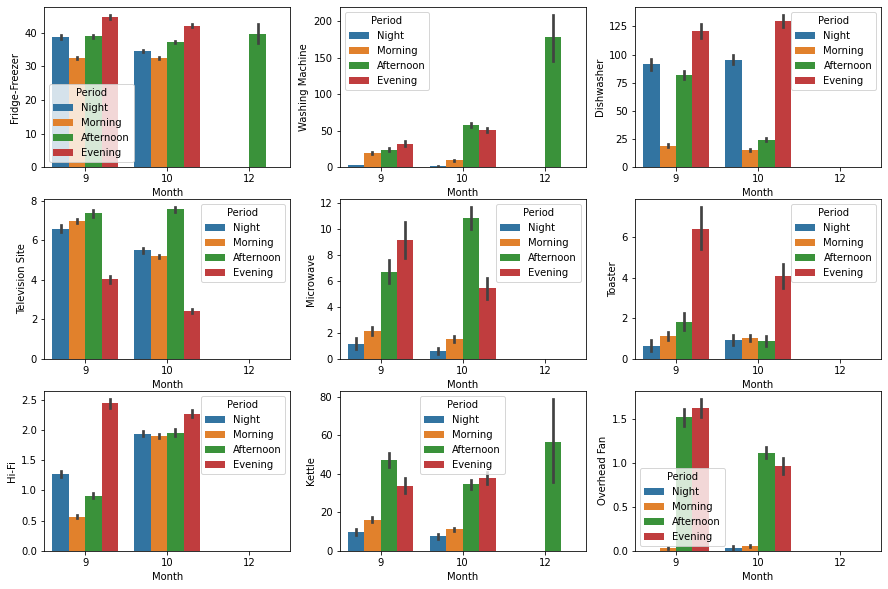

In [23]:
#Explore time-of-use of appliances at different hours of the day for the different months
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.barplot(x=df2['Month'], y=df2['Fridge-Freezer'], hue = df2['Period'])
plt.subplot(3,3,2)
sns.barplot(x=df2['Month'], y=df2['Washing Machine'], hue = df2['Period'])
plt.subplot(3,3,3)
sns.barplot(x=df2['Month'], y=df2['Dishwasher'], hue = df2['Period'])
plt.subplot(3,3,4)
sns.barplot(x=df2['Month'], y=df2['Television Site'], hue = df2['Period'])
plt.subplot(3,3,5)
sns.barplot(x=df2['Month'], y=df2['Microwave'], hue = df2['Period'])
plt.subplot(3,3,6)
sns.barplot(x=df2['Month'], y=df2['Toaster'], hue = df2['Period'])
plt.subplot(3,3,7)
sns.barplot(x=df2['Month'], y=df2['Hi-Fi'], hue = df2['Period'])
plt.subplot(3,3,8)
sns.barplot(x=df2['Month'], y=df2['Kettle'], hue = df2['Period'])
plt.subplot(3,3,9)
sns.barplot(x=df2['Month'], y=df2['Overhead Fan'], hue = df2['Period'])

# Finding different outliers for the appliances

In [24]:
dx

,Time,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
0,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
1,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
2,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
3,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
4,2013-09-17 22:08:00,88,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,1,5,0,0,0,0,0,0,0
487247,2013-12-26 16:08:00,1,5,0,0,0,0,0,0,0
487248,2013-12-26 16:08:00,1,25,0,0,0,0,0,0,0
487249,2013-12-26 16:08:00,1,25,0,0,0,0,0,0,0


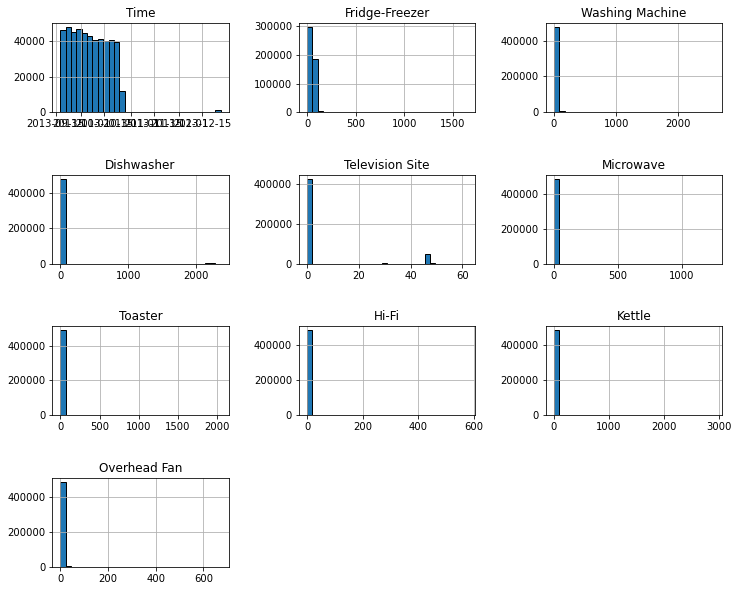

In [25]:
#Check the distribution of all variables
dx.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [26]:
#finding the different values of all appliances
dx.describe()

,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan
count,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000,487251.000000
mean,35.509772,21.637725,48.534603,5.832907,3.713427,1.518560,1.590277,20.477056,0.427638
std,45.337155,193.706782,311.842492,15.350397,64.432395,37.737607,5.416394,234.841950,5.201527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1647.000000,2571.000000,2358.000000,62.000000,1251.000000,2048.000000,576.000000,2905.000000,672.000000


Text(0.5, 1.0, 'Boxplot')

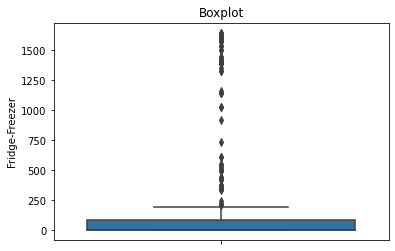

In [27]:
#Boxplot to examine outlier
sns.boxplot(y=dx['Fridge-Freezer'])
plt.title('Boxplot')

In [28]:
def find_boundaries(dx, variable, distance):

    IQR = df1[variable].quantile(0.75) - df1[variable].quantile(0.25)

    lower_boundary = df1[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df1[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [29]:
#Calculate and then display the IQR proximity rule boundaries for Dishwasher:
#Values below or above the upper and lower boundary by 1.5
upper_boundary, lower_boundary = find_boundaries(dx, 'Dishwasher', 1.5)
upper_boundary, lower_boundary

(0.0, 0.0)

In [30]:
#Now, we need to find the outliers in the dataframe.
#Create a boolean vector to flag observations outside the boundaries we determined:
outliers = np.where(dx['Dishwasher'] > upper_boundary, True,
            np.where(dx['Dishwasher'] < lower_boundary, True, False))
outliers

array([False, False, False, ..., False, False, False])

In [31]:
#Creating a new dataframe with the outlier values and displaying the top 20
outliers_df = dx.loc[outliers, 'Dishwasher']
outliers_df.head(20)

8523     22
8524     22
8525     17
8526      5
8527      5
8528      5
8529    162
8530    169
8531     66
8532     63
8533     68
8534     68
8535     69
8536     64
8537     64
8538     71
8539     72
8540     71
8541     71
8542     72
Name: Dishwasher, dtype: int64

In [32]:
# Showing the different consumption rates and give warnings

In [33]:

ds = df1.loc[:,['Aggregate']]
ds

,Aggregate
0,695
1,694
2,694
3,702
4,700
...,...
487246,355
487247,358
487248,322
487249,280


In [34]:
ds.loc[ds['Aggregate']<= 1800, 'Usage'] = 'Low' #when consuption falls below 1800kWh
ds.loc[ds['Aggregate']> 4300, 'Usage'] = 'High'  #consumption above 4300kWh
ds.fillna('Medium', inplace = True)       #Consumption that falls between the Low and High Usage
ds

,Aggregate,Usage
0,695,Low
1,694,Low
2,694,Low
3,702,Low
4,700,Low
...,...,...
487246,355,Low
487247,358,Low
487248,322,Low
487249,280,Low


# Predicting usage of electricity of the appliances

In [35]:
# Loading the data
df2

,Time,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,...,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week,is_holiday,Period
0,2013-09-17 22:08:00,695,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
1,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
2,2013-09-17 22:08:00,694,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
3,2013-09-17 22:08:00,702,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
4,2013-09-17 22:08:00,700,88,0,0,0,0,0,0,0,...,9,17,22,8,3,260,17,38,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,2013-12-26 16:07:00,355,1,5,0,0,0,0,0,0,...,12,26,16,7,4,360,26,52,0,Afternoon
487247,2013-12-26 16:08:00,358,1,5,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon
487248,2013-12-26 16:08:00,322,1,25,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon
487249,2013-12-26 16:08:00,280,1,25,0,0,0,0,0,0,...,12,26,16,8,4,360,26,52,0,Afternoon


In [36]:
df= df2.drop(['Time','Period','Date_x'],axis=1)
df

,Aggregate,Fridge-Freezer,Washing Machine,Dishwasher,Television Site,Microwave,Toaster,Hi-Fi,Kettle,Overhead Fan,Year,Month,Day,Hour,Minute,quarter,dayofyear,dayofmonth,Week,is_holiday
0,695,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,3,260,17,38,0
1,694,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,3,260,17,38,0
2,694,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,3,260,17,38,0
3,702,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,3,260,17,38,0
4,700,88,0,0,0,0,0,0,0,0,2013,9,17,22,8,3,260,17,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487246,355,1,5,0,0,0,0,0,0,0,2013,12,26,16,7,4,360,26,52,0
487247,358,1,5,0,0,0,0,0,0,0,2013,12,26,16,8,4,360,26,52,0
487248,322,1,25,0,0,0,0,0,0,0,2013,12,26,16,8,4,360,26,52,0
487249,280,1,25,0,0,0,0,0,0,0,2013,12,26,16,8,4,360,26,52,0


In [37]:
df.dtypes

Aggregate           int64
Fridge-Freezer      int64
Washing Machine     int64
Dishwasher          int64
Television Site     int64
Microwave           int64
Toaster             int64
Hi-Fi               int64
Kettle              int64
Overhead Fan        int64
Year                int64
Month               int64
Day                 int64
Hour                int64
Minute              int64
quarter             int64
dayofyear           int64
dayofmonth          int64
Week               UInt32
is_holiday          int32
dtype: object

In [38]:
# Splitting the data into training and validation tests using a function
def data_split(df,target_variable):
    X = df[['Month', 'Day','Hour','Minute','quarter','dayofyear','Week']]
    
    if target_variable:
        y = df[target_variable]
    
    # split the full data 80:20 into training:valid sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=101)

    return X_train,X_valid,y_train,y_valid

In [39]:
# Using Fridge-Freezer as the target variable
X_train, X_valid, y_train, y_valid = data_split(df,target_variable='Fridge-Freezer')

In [40]:
X_train

,Month,Day,Hour,Minute,quarter,dayofyear,Week
294544,10,9,15,21,4,282,41
297967,10,9,21,47,4,282,41
141219,9,28,1,55,3,271,39
353645,10,14,11,8,4,287,42
386141,10,17,3,58,4,290,42
...,...,...,...,...,...,...,...
136767,9,27,16,25,3,270,39
204614,10,2,13,16,4,275,40
476497,10,24,17,38,4,297,43
214539,10,3,6,46,4,276,40


In [41]:
y_train

294544     83
297967     82
141219      1
353645    162
386141     87
         ... 
136767    167
204614      1
476497      1
214539     86
176991      1
Name: Fridge-Freezer, Length: 389800, dtype: int64

In [42]:
# Further splitting the data into a test set
# There are three sets of training, validation and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.875, random_state=101)  

In [43]:
# Set up a function to encode according to the input provided using one-hot encoding
def encoding(df):
    enc = pd.get_dummies(df, drop_first=True) 
    return enc

In [44]:
#Apply encoding function
X_train = encoding(X_train)

In [45]:
X_train

,Month,Day,Hour,Minute,quarter,dayofyear,Week
267330,10,7,10,0,4,280,41
404411,10,18,16,24,4,291,42
58707,9,22,2,55,3,265,38
222749,10,3,22,38,4,276,40
173051,9,30,7,58,3,273,40
...,...,...,...,...,...,...,...
87809,9,24,3,44,3,267,39
303691,10,10,10,13,4,283,41
18202,9,19,6,17,3,262,38
224455,10,4,1,53,4,277,40


In [46]:
X_valid = encoding(X_valid)

In [47]:
X_test = encoding(X_test)

# Scaling

In [48]:
# Scaling features to a common scale
scaler = RobustScaler()
scaler.fit(X_train)

RobustScaler()

In [49]:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [50]:
variables = ['Month', 'Day','Hour','Minute','quarter','dayofyear','Week']
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = variables)
X_valid_scaled_df = pd.DataFrame(X_valid_scaled, columns = variables)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = variables)

In [51]:
y_train.isnull().sum()

0

<AxesSubplot:>

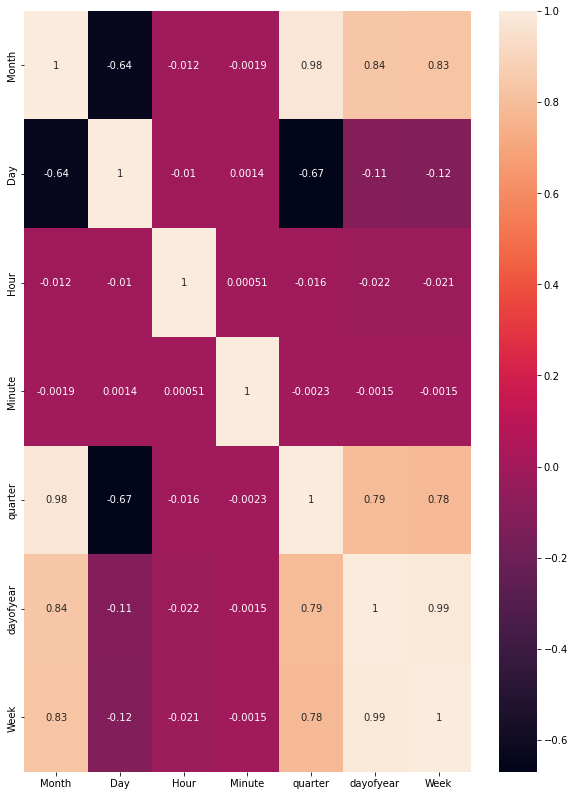

In [52]:
#Checking for correlation beyween the features
# Create a correlation matrix for the dataframe
relation = X_train_scaled_df.corr()
#Create a heatmap to visualize correlation between the features
fig, ax = plt.subplots(figsize = (10, 14))
sns.heatmap(relation, annot = True)

In [53]:
X_train_scaled_df.drop(['Month'], axis=1, inplace=True)
X_train_scaled_df

,Day,Hour,Minute,quarter,dayofyear,Week
0,-0.923077,-0.083333,-1.000000,0.0,0.105263,0.333333
1,-0.076923,0.416667,-0.200000,0.0,0.684211,0.666667
2,0.230769,-0.750000,0.833333,-1.0,-0.684211,-0.666667
3,-1.230769,0.916667,0.266667,0.0,-0.105263,0.000000
4,0.846154,-0.333333,0.933333,-1.0,-0.263158,0.000000
...,...,...,...,...,...,...
341070,0.384615,-0.666667,0.466667,-1.0,-0.578947,-0.333333
341071,-0.692308,-0.083333,-0.566667,0.0,0.263158,0.333333
341072,0.000000,-0.416667,-0.433333,-1.0,-0.842105,-0.666667
341073,-1.153846,-0.833333,0.766667,0.0,-0.052632,0.000000


In [54]:
X_valid_scaled_df.drop(['Month'], axis=1, inplace=True)
X_valid_scaled_df

,Day,Hour,Minute,quarter,dayofyear,Week
0,0.076923,-0.583333,0.866667,-1.0,-0.789474,-0.666667
1,0.846154,0.416667,0.600000,-1.0,-0.263158,0.000000
2,0.307692,0.333333,-0.800000,0.0,0.947368,1.000000
3,0.384615,-0.666667,-0.666667,0.0,1.000000,1.000000
4,0.153846,-0.916667,-0.466667,-1.0,-0.736842,-0.666667
...,...,...,...,...,...,...
97446,0.000000,0.333333,-0.433333,-1.0,-0.842105,-0.666667
97447,-1.000000,0.416667,-0.966667,0.0,0.052632,0.000000
97448,0.307692,0.000000,-0.466667,-1.0,-0.631579,-0.333333
97449,0.153846,0.750000,0.800000,-1.0,-0.736842,-0.666667


In [55]:
X_test_scaled_df.drop(['Month'], axis=1, inplace=True)
X_test_scaled_df

,Day,Hour,Minute,quarter,dayofyear,Week
0,0.461538,-0.916667,-0.266667,-1.0,-0.526316,-0.333333
1,-0.692308,-0.916667,-0.400000,0.0,0.263158,0.333333
2,0.461538,-0.916667,-0.633333,0.0,1.052632,1.000000
3,0.230769,-0.250000,0.800000,-1.0,-0.684211,-0.666667
4,0.000000,-0.583333,0.900000,-1.0,-0.842105,-0.666667
...,...,...,...,...,...,...
48720,0.538462,-0.083333,-0.466667,-1.0,-0.473684,-0.333333
48721,0.230769,0.583333,0.533333,-1.0,-0.684211,-0.666667
48722,0.076923,-0.666667,0.566667,-1.0,-0.789474,-0.666667
48723,-1.384615,-0.416667,0.200000,0.0,-0.210526,0.000000


In [56]:
scaler = RobustScaler()
scaler.fit(X_train_scaled_df)

X_train_scaled = scaler.transform(X_train_scaled_df)
X_valid_scaled = scaler.transform(X_valid_scaled_df)
X_test_scaled = scaler.transform(X_test_scaled_df)

Text(0.5, 1.0, 'Day of Year Against Fridge-Freezer')

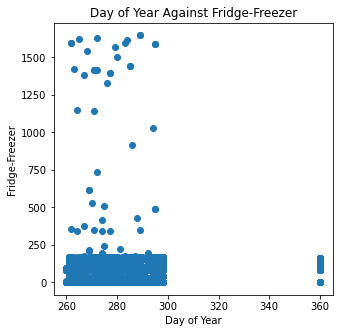

In [57]:
# Visualizing Month and Fridge-Freezer
plt.figure(figsize=(5, 5))

plt.scatter(X_train['dayofyear'],y_train)

plt.xlabel('Day of Year')
plt.ylabel('Fridge-Freezer')
plt.title('Day of Year Against Fridge-Freezer')

# Feature Importance

dayofyear    -9.032690
quarter      -2.871593
Day          -0.530208
Minute       -0.198574
Hour          5.039369
Week         10.939241
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Our Revenue Using Linear Regression'}>

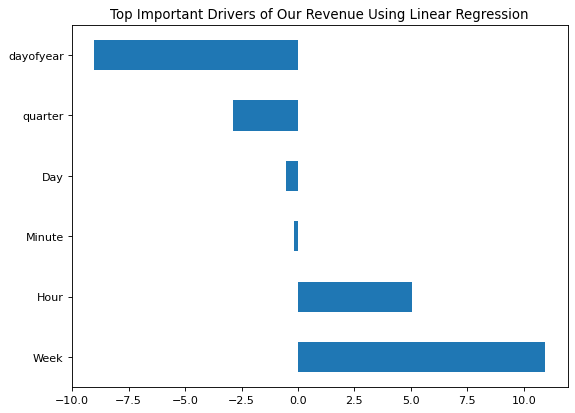

In [58]:
# define the model
model = LinearRegression()
# fit the model (I used validation data here because the train data(y_train) need to be fixed)
model.fit(X_valid_scaled_df, y_valid)
# get importance
importance = model.coef_
# summarize feature importance
predictors = X_valid_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Our Revenue Using Linear Regression")

feat_importances = pd.Series(model.coef_, index= X_valid_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh')

quarter      0.004630
Week         0.026014
Hour         0.186732
dayofyear    0.230236
Day          0.243388
Minute       0.309000
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Our Consumption Using Decision Tree'}>

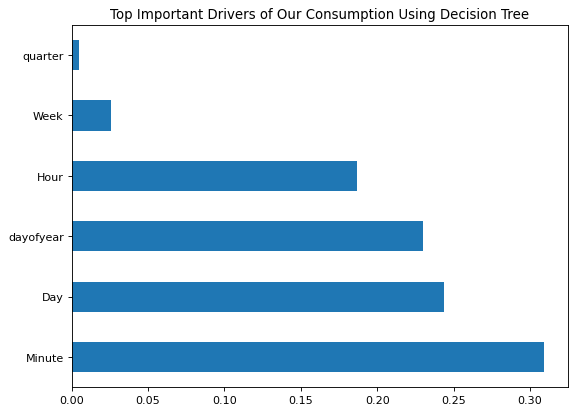

In [59]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train_scaled_df, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Our Consumption Using Decision Tree")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh')

quarter      0.005492
Week         0.026776
Day          0.217847
Hour         0.218391
dayofyear    0.227898
Minute       0.303596
dtype: float64


<AxesSubplot:title={'center':'Top Important Drivers of Consumption Using Random Forest'}>

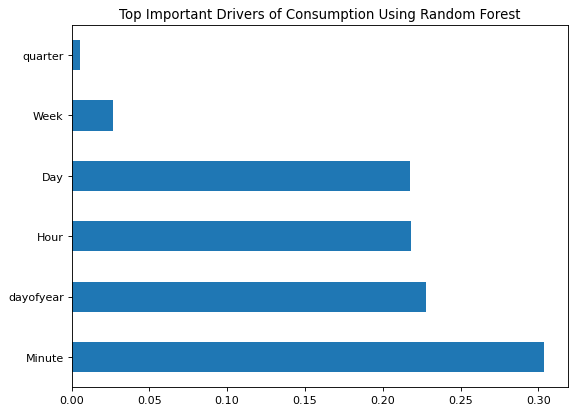

In [60]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train_scaled_df, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
predictors = X_train_scaled_df.columns
coef = pd.Series(importance, predictors).sort_values()
print(coef)  

# visualize feature importance
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Top Important Drivers of Consumption Using Random Forest")

feat_importances = pd.Series(model.feature_importances_, index= X_train_scaled_df.columns)

feat_importances.nlargest(6).plot(kind='barh')

# Prediction models

In [61]:
linear_regression = LinearRegression()
# Use trainning data to train the estimator
linear_regression.fit(X_train_scaled_df, y_train)
# Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred1 = linear_regression.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred1, y_test))

test_mse1 = mean_squared_error(y_pred1, y_test)

test_rmse1 = np.sqrt(test_mse1)

print('Test RMSE: %.2f' % test_rmse1)

Test r2 score:  -200.63129537204495
Test RMSE: 45.33


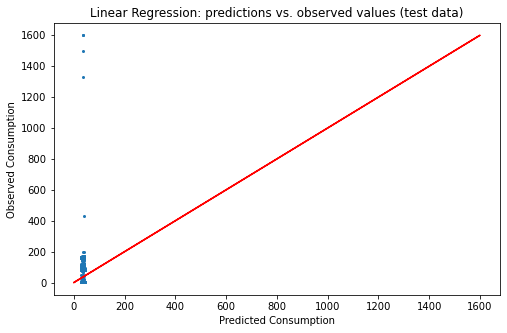

In [63]:
#Evaluate the Performance of our Predictive Model (Linear Regression)
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(linear_regression.predict(X_test_scaled_df), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('Linear Regression: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Consumption')
ax.set_ylabel('Observed Consumption');

In [64]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='euclidean', n_jobs=-1)
# 3. Use the trainning data to train the estimator
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(metric='euclidean', n_jobs=-1, weights='distance')

In [65]:
y_pred2 = knn.predict(X_test_scaled) # Test

print('Test r2 score: ', r2_score(y_pred2, y_test))

test_mse2 = mean_squared_error(y_pred2, y_test)

test_rmse2 = np.sqrt(test_mse2)

print('Test RMSE: %.2f' % test_rmse2)

Test r2 score:  0.8761609347585084
Test RMSE: 15.31


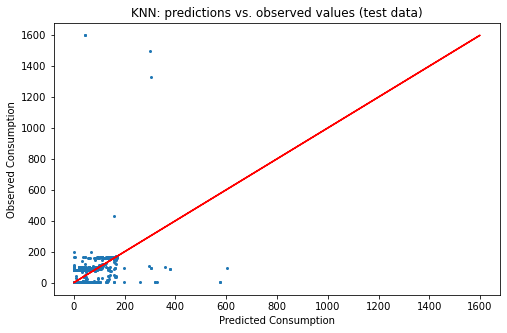

In [66]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(knn.predict(X_test_scaled), y_test, s=4)
ax.plot(y_test, y_test, color='red')
ax.set_title('KNN: predictions vs. observed values (test data)')
ax.set_xlabel('Predicted Consumption')
ax.set_ylabel('Observed Consumption');

In [72]:
# 2. Create an instance of the estimator
dtree = DecisionTreeRegressor(max_depth=3)
# 3. Use the trainning data to train the estimator
dtree.fit(X_train_scaled_df, y_train)

DecisionTreeRegressor(max_depth=3)

In [74]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred3 = dtree.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred3, y_test))

test_mse3 = mean_squared_error(y_pred3, y_test)

test_rmse3 = np.sqrt(test_mse3)

print('Test RMSE: %.2f' % test_rmse3)

Test r2 score:  -53.603952177706894
Test RMSE: 45.00


In [75]:
# Using Random Forest Model
#Create an instance of the estimator
rf = RandomForestRegressor(max_depth=3) #Notice here also we are using here "random forest regressor" not "random forest classifier"
# 3. Use the trainning data to train the estimator
rf.fit(X_train_scaled_df, y_train)

RandomForestRegressor(max_depth=3)

In [70]:
#Prediction and Model Evaluation (R-squared,MSE,RMSE,MAE) 
y_pred4 = rf.predict(X_test_scaled_df) # Test

print('Test r2 score: ', r2_score(y_pred4, y_test))

test_mse4 = mean_squared_error(y_pred4, y_test)

test_rmse4 = np.sqrt(test_mse4)

print('Test RMSE: %.2f' % test_rmse4)

Test r2 score:  -55.28213093700413
Test RMSE: 44.98
